### Import Required Libraries

In [70]:
import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
from datetime import datetime
import ast
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
pd.set_option('display.max_columns', None)

### Read Istanbul's Airbnb Listings Dataset for Q4 - 2023

In [2]:
q4_lst = pd.read_csv("data/Istanbul/EO2023/listings.csv", parse_dates=["last_scraped", "host_since", "calendar_last_scraped", "first_review", "last_review"])
length = q4_lst.shape[0]
print(length)

37992


### I. Data Understanding

In [3]:
q4_lst.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,25436,https://www.airbnb.com/rooms/25436,20231229025644,2023-12-29,city scrape,Rental unit in Beşiktaş/ bebek · 2 bedrooms · ...,NaN,NaN,https://a0.muscache.com/pictures/b64c3ef0-2256...,105823,https://www.airbnb.com/users/show/105823,Yesim,2010-04-09,"İstanbul, Turkey","Merhabalar . Kuş sesi , akan su sesi ile uyan...",within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/067a8...,https://a0.muscache.com/im/pictures/user/067a8...,Beşiktaş,1,1,"['email', 'phone']",t,t,NaN,Besiktas,NaN,41.07883,29.03863,Entire rental unit,Entire home/apt,3,NaN,1 bath,NaN,4.0,[],"$3,968.00",3,160,1,1,160,160,1.0,160.0,NaN,t,28,58,88,214,2023-12-29,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,27271,https://www.airbnb.com/rooms/27271,20231229025644,2023-12-30,city scrape,Rental unit in Istanbul Province · ★5.0 · 1 be...,NaN,Cihangir is one of Istanbul's cosmopolitan sub...,https://a0.muscache.com/pictures/2f9cfc85-8370...,117026,https://www.airbnb.com/users/show/117026,Mutlu,2010-05-02,"Istanbul, Turkey",I am a tourist guide and diving instructor. I...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/44954...,https://a0.muscache.com/im/pictures/user/44954...,Cihangir,1,1,"['email', 'phone']",t,t,"Istanbul Province, Turkey",Beyoglu,NaN,41.03254,28.98153,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,1.0,[],"$1,634.00",10,90,10,10,90,90,10.0,90.0,NaN,t,0,0,28,303,2023-12-30,4,0,0,2014-10-20,2022-11-01,5.00,5.00,4.75,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.04
2,28318,https://www.airbnb.com/rooms/28318,20231229025644,2023-12-30,previous scrape,Rental unit in İstanbul · 2 bedrooms · 2 beds ...,NaN,Close to Bosphorus University<br />Close to Be...,https://a0.muscache.com/pictures/76617600/0ab5...,121721,https://www.airbnb.com/users/show/121721,Aydin,2010-05-10,"Istanbul, Turkey",Hardworking guy with many interests. Curious a...,within an hour,100%,NaN,f,https://a0.muscache.com/im/users/121721/profil...,https://a0.muscache.com/im/users/121721/profil...,NaN,1,1,"['email', 'phone']",t,t,"İstanbul, Turkey",Sariyer,NaN,41.09104,29.05580,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,2.0,[],"$3,693.00",3,60,3,3,60,60,3.0,60.0,NaN,t,28,58,88,88,2023-12-30,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
3,34177,https://www.airbnb.com/rooms/34177,20231229025644,2023-12-29,city scrape,Home in Beşiktaş · ★4.67 · 1 bedroom · 2 beds ...,NaN,the neighbourhood is very calm comparing the...,https://a0.muscache.com/pictures/47356451/c288...,147330,https://www.airbnb.com/users/show/147330,Ercan,2010-06-18,"Istanbul, Turkey",grounded and well-traveled interior architect,within an hour,100%,78%,t,https://a0.muscache.com/

In [4]:
#View Numerical Columns
q4_lst.select_dtypes(include='number').columns

Index(['id', 'scrape_id', 'description', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       

In [5]:
#View Categorical Columns
q4_lst.select_dtypes(include='object').columns

Index(['listing_url', 'source', 'name', 'neighborhood_overview', 'picture_url',
       'host_url', 'host_name', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'bathrooms_text', 'amenities', 'price',
       'has_availability', 'instant_bookable'],
      dtype='object')

In [6]:
def plot_bar_chart(data, title: str, ylabel: str, xlabel: str):
    plt.figure(figsize=(18, 6))
    data.plot(kind='bar')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    #plt.xticks(rotation=45)
    plt.show()

In [7]:
def plot_histogram(data, title: str, ylabel: str, xlabel: str, bins = 30, xticks = None):
    # Histogram
    plt.figure(figsize=(20, 6))
    plt.hist(data, bins = bins, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xticks:
        plt.xticks(range(1, data.max() + 1))
    plt.show()

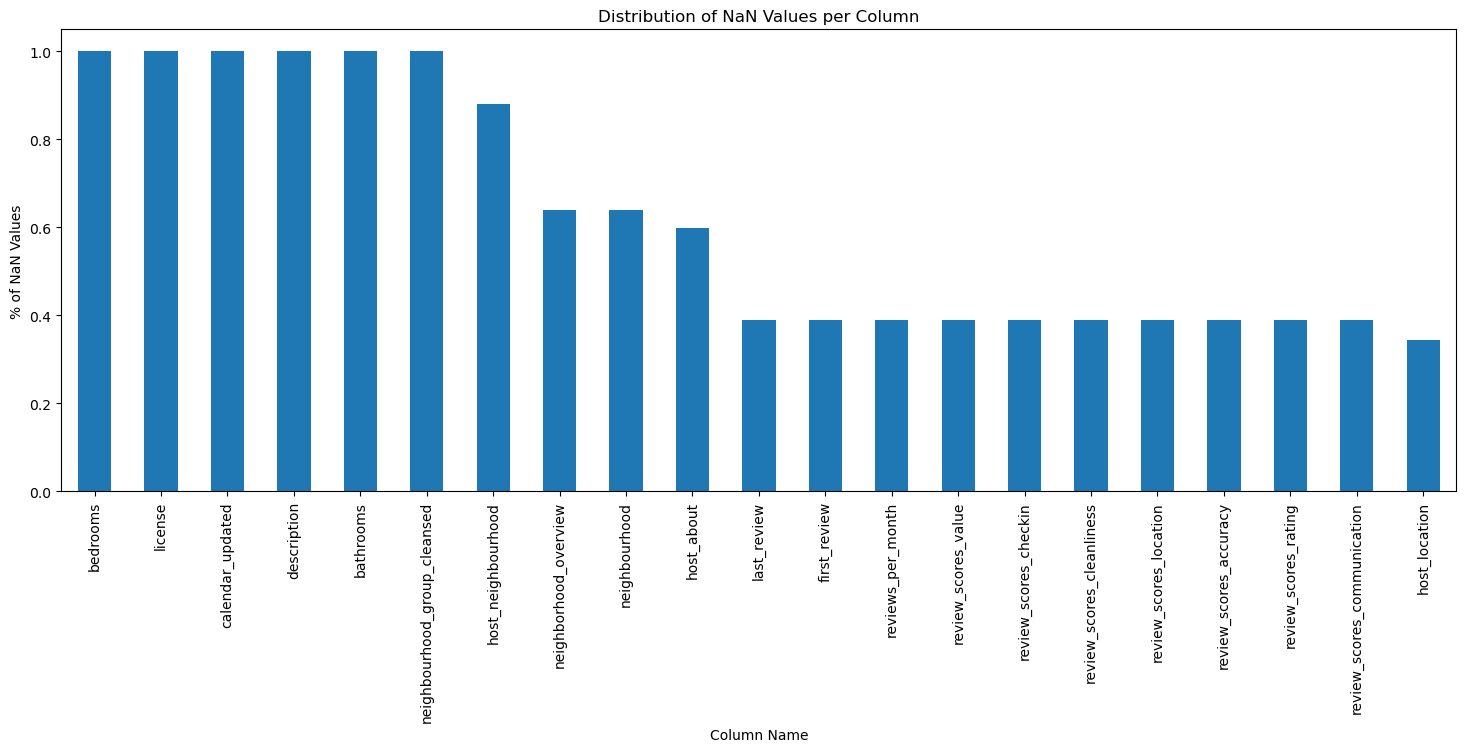

In [8]:
# View >= 20% null columns with sorting descendingly
null_counts = q4_lst.isnull().mean().sort_values(ascending=False)
null_counts = null_counts[null_counts >= 0.2]
plot_bar_chart(null_counts, title='Distribution of NaN Values per Column', ylabel="% of NaN Values", xlabel="Column Name")

#### Assumption: Blocked listings are listings with no availability throughout the year (has_availability is True and availability_365 > 0)

In [9]:
#Filter out blocked listings (not available for 365 days)
q4_lst = q4_lst.query("has_availability == 't' & availability_365>0")
print(f"Removed {(length-q4_lst.shape[0])/length}")
q4_lst[q4_lst.columns[q4_lst.isna().mean()>0.2]].isna().mean()

Removed 0.06614550431669826


description                     1.000000
neighborhood_overview           0.643536
host_location                   0.343753
host_about                      0.598410
host_neighbourhood              0.880944
neighbourhood                   0.643536
neighbourhood_group_cleansed    1.000000
bathrooms                       1.000000
bedrooms                        1.000000
calendar_updated                1.000000
first_review                    0.388934
last_review                     0.388934
review_scores_rating            0.388934
review_scores_accuracy          0.388934
review_scores_cleanliness       0.389019
review_scores_checkin           0.389075
review_scores_communication     0.388934
review_scores_location          0.388991
review_scores_value             0.389075
license                         1.000000
reviews_per_month               0.388934
dtype: float64

In [10]:
#Drop Columns with all NaN Values
q4_lst = q4_lst.dropna(axis=1, how="all")

#### Analyze Interesting Variables

#### Property Type

In [11]:
q4_lst["property_type"].value_counts()/q4_lst.shape[0]

Entire rental unit             0.521463
Private room in rental unit    0.136588
Entire condo                   0.053722
Room in hotel                  0.051862
Entire home                    0.046394
                                 ...   
Lighthouse                     0.000028
Entire home/apt                0.000028
Shared room in villa           0.000028
Shared room in pension         0.000028
Shared room in tower           0.000028
Name: property_type, Length: 94, dtype: float64

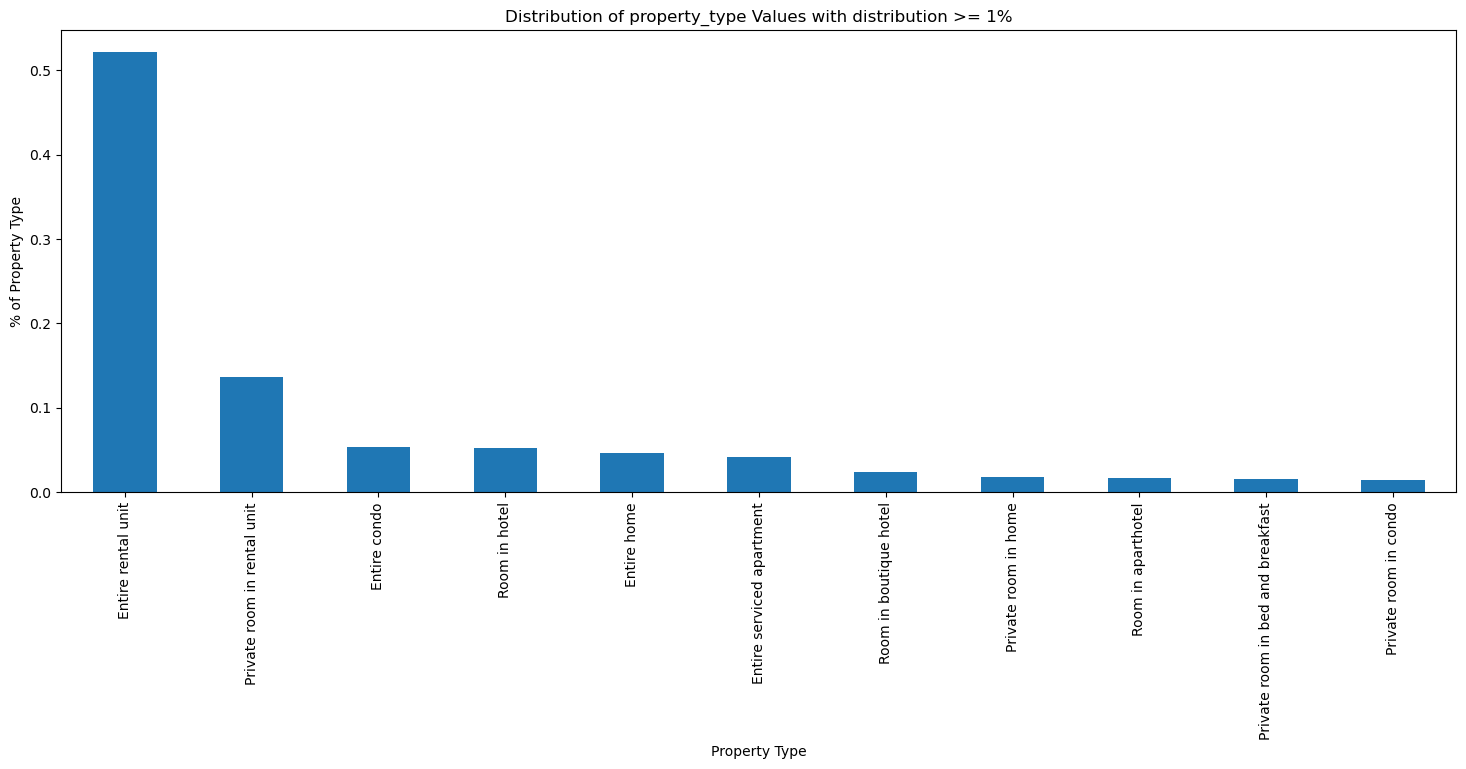

In [12]:
property_dist = q4_lst["property_type"].value_counts()/q4_lst.shape[0]
property_dist = property_dist[property_dist >= 0.01]
plot_bar_chart(property_dist, title='Distribution of property_type Values with distribution >= 1%', ylabel="% of Property Type", xlabel="Property Type")

#### Room Type

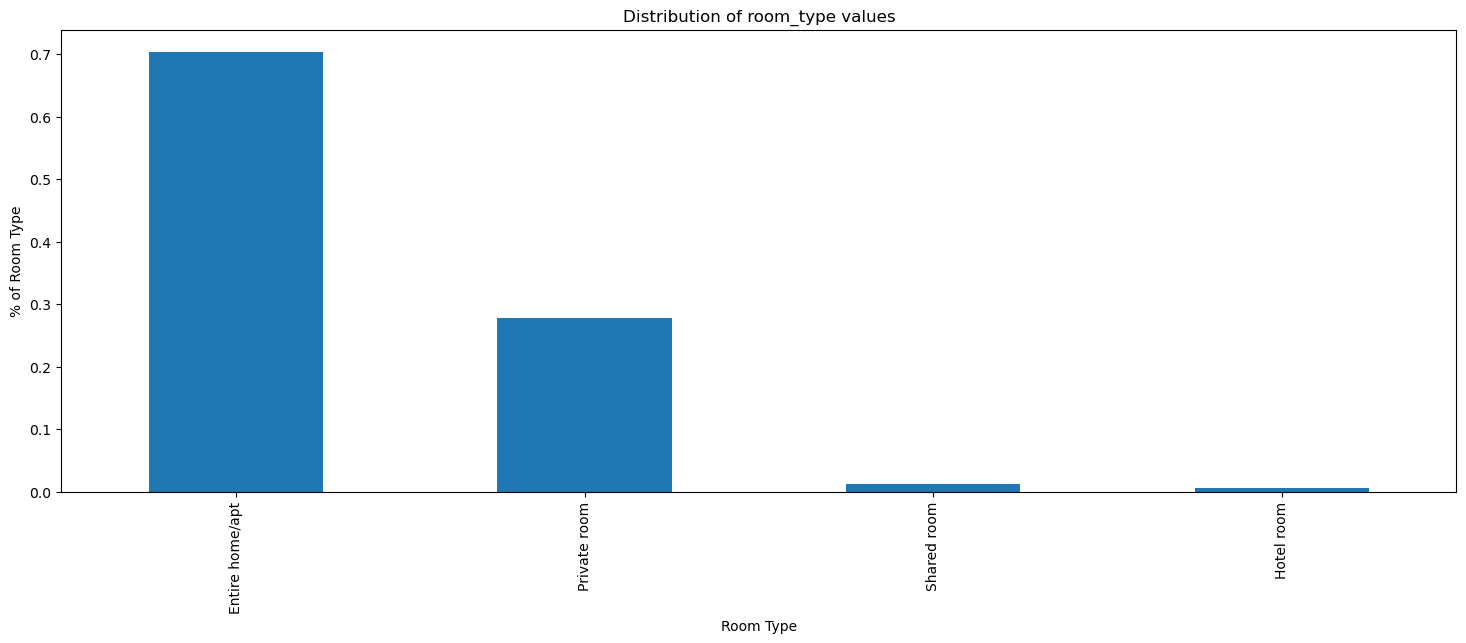

In [13]:
room_dist = q4_lst["room_type"].value_counts()/q4_lst.shape[0]
plot_bar_chart(room_dist, title="Distribution of room_type values", ylabel="% of Room Type", xlabel="Room Type")

#### Accomodation Size

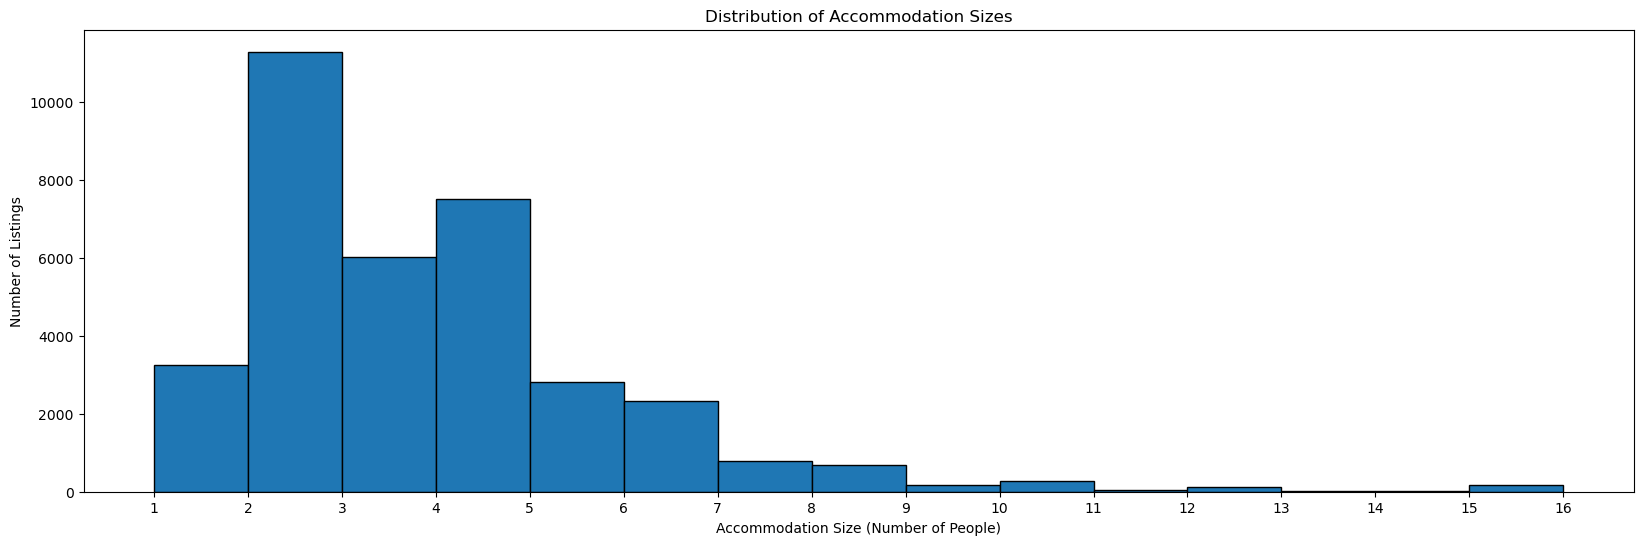

In [14]:
acc_size = q4_lst['accommodates'].sort_values(ascending=True)
plot_histogram(acc_size, title="Distribution of Accommodation Sizes", ylabel="Number of Listings", xlabel="Accommodation Size (Number of People)", bins=range(1, acc_size.max()+1), xticks=True)

#### Beds

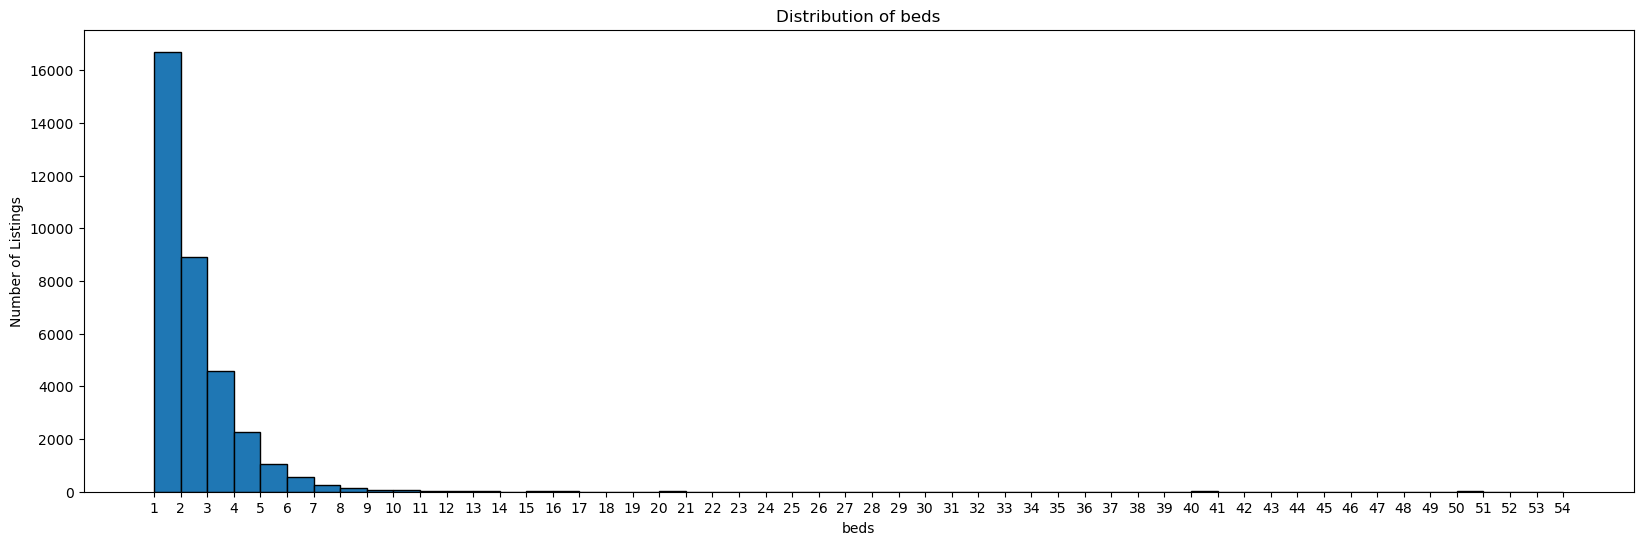

In [15]:
beds = q4_lst['beds'].sort_values(ascending=True).dropna().astype(int)
plot_histogram(beds, title="Distribution of beds", ylabel="Number of Listings", xlabel="beds", bins=range(1, beds.max()+1), xticks=True)

#### Number of Reviews

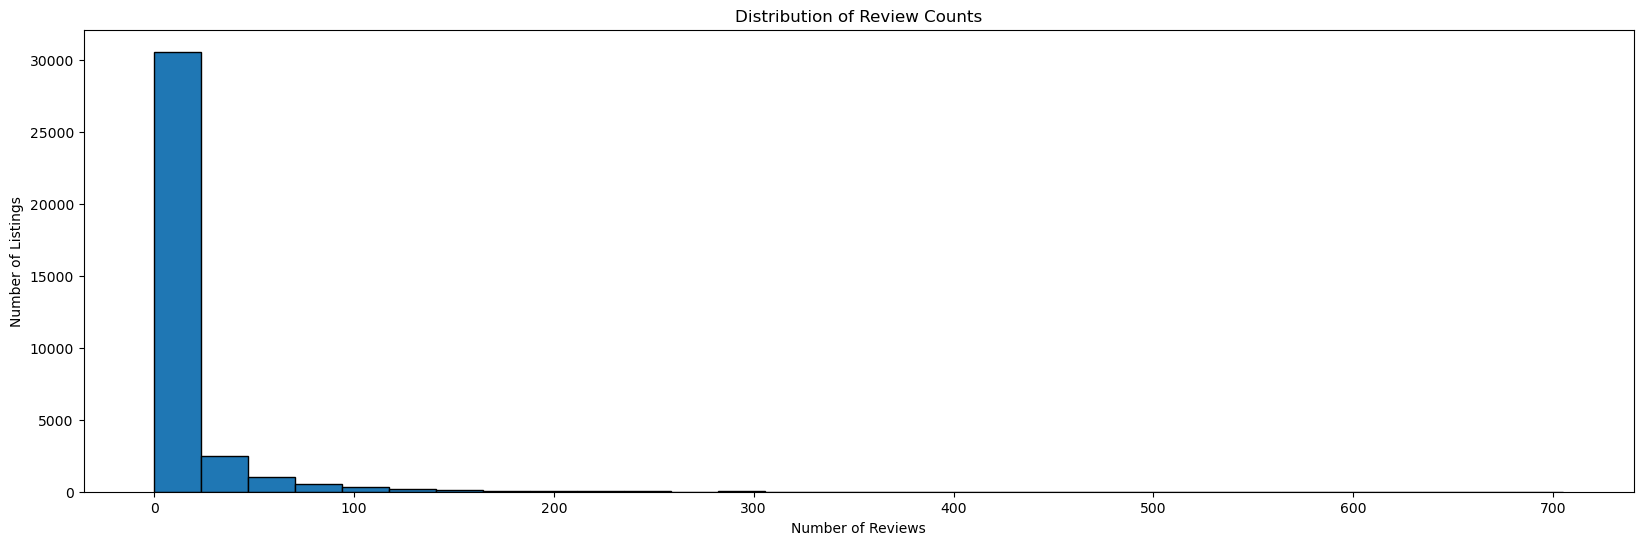

In [16]:
plot_histogram(q4_lst['number_of_reviews'], title="Distribution of Review Counts", ylabel="Number of Listings", xlabel="Number of Reviews")

#### Neighbourhood

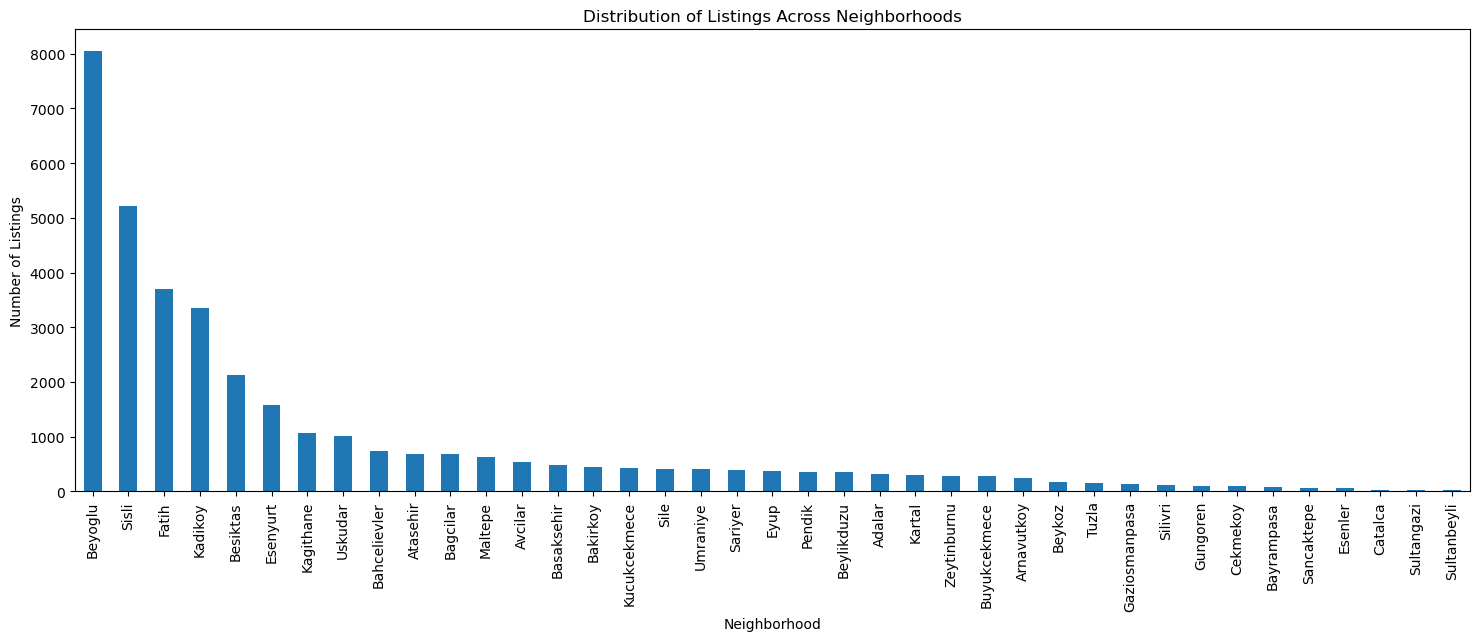

In [17]:
neighborhood_counts = q4_lst['neighbourhood_cleansed'].value_counts()
# Plot bar chart
plot_bar_chart(data=neighborhood_counts, title="Distribution of Listings Across Neighborhoods", ylabel="Number of Listings", xlabel="Neighborhood")

### II. Data Preparation

In [18]:
# Convert Boolean features to Numerical format
mapping = {'t': 1, 'f': 0, -1:-1}

q4_lst['host_is_superhost'] = q4_lst['host_is_superhost'].fillna(-1).map(mapping).astype(int)
q4_lst['has_availability'] = q4_lst['has_availability'].fillna(-1).map(mapping).astype(int)
q4_lst['instant_bookable'] = q4_lst['instant_bookable'].fillna(-1).map(mapping).astype(int)
q4_lst['host_identity_verified'] = q4_lst['host_identity_verified'].fillna(-1).map(mapping).astype(int)
q4_lst['host_has_profile_pic'] = q4_lst['host_has_profile_pic'].fillna(-1).map(mapping).astype(int)

In [19]:
q4_lst['price'] = q4_lst['price'].str.replace("$", "").str.replace(",", "").astype(float)

/var/folders/6_/fb5qsd194x777fhvyzrybjmw0000gn/T/ipykernel_37307/682651717.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  q4_lst['price'] = q4_lst['price'].str.replace("$", "").str.replace(",", "").astype(float)


In [20]:
#Clean host_response_rate and host_acceptance_rate by removing the % sign and dividing by 100
q4_lst["host_response_rate"] = (q4_lst["host_response_rate"].fillna("-100%").str.replace("%", "").astype(int) / 100).astype(float)
q4_lst["host_acceptance_rate"] = (q4_lst["host_acceptance_rate"].fillna("-100%").str.replace("%", "").astype(int) / 100).astype(float)

In [21]:
# Calculate the frequency of each property type
property_type_counts = q4_lst['property_type'].value_counts()

# Calculate the cumulative percentage
cumulative_percentage = property_type_counts.cumsum() / property_type_counts.sum()

# Select categories that represent 95% of the data
selected_categories = cumulative_percentage[cumulative_percentage <= 0.95].index

# Filter the DataFrame based on selected categories
q4_lst = q4_lst[q4_lst['property_type'].isin(selected_categories)]

In [22]:
# Extract the numbers from bathroom_text
bath_numbers = q4_lst['bathrooms_text'].str.extract(r'(\d+\.?\d*)')

# Converting the extracted values to float
bath_numbers = bath_numbers.astype(float)

# Handling special cases like 'Half-bath'
# Assuming 'Half-bath' should be counted as 0.5
bath_numbers[0] = bath_numbers[0].fillna(0.5)

# Assigning the cleaned values back to the DataFrame
q4_lst['bathrooms_cleaned'] = bath_numbers
q4_lst['bathrooms_cleaned'] = q4_lst['bathrooms_cleaned'].astype(float)

#### Bathrooms

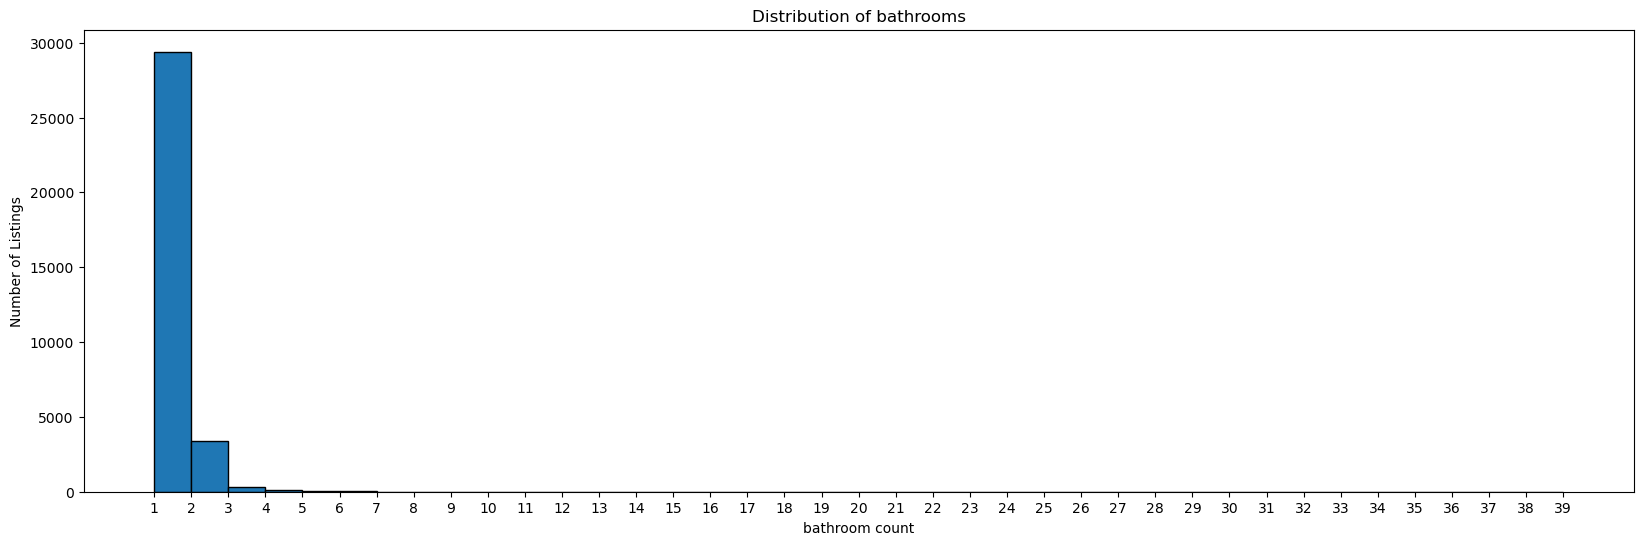

In [23]:
# Visualize distribution of bathrooms
bathrooms = q4_lst['bathrooms_cleaned'].sort_values(ascending=True).astype(int)
plot_histogram(data=bathrooms, title="Distribution of bathrooms", ylabel="Number of Listings", xlabel="bathroom count", bins=range(1, bathrooms.max() + 1), xticks=True)

In [24]:
# Create additional informative features
# q4_lst["has_description"] = q4_lst["description"].notna().astype(int)
q4_lst["has_neighborhood_overview"] = q4_lst["neighborhood_overview"].notna().astype(int)
q4_lst["has_host_location"] = q4_lst["host_location"].notna().astype(int)
q4_lst["has_host_about"] = q4_lst["host_about"].notna().astype(int)

q4_lst['host_tenure_days'] = (pd.to_datetime('today') - q4_lst['host_since']).dt.days
q4_lst['first_review_days'] = (pd.to_datetime('today') - q4_lst['first_review']).dt.days
q4_lst['last_review_days'] = (pd.to_datetime('today') - q4_lst['last_review']).dt.days
q4_lst['first_to_last_review_days'] = (q4_lst['last_review'] - q4_lst['first_review']).dt.days
q4_lst.head(3)


,id,listing_url,scrape_id,last_scraped,source,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms_cleaned,has_neighborhood_overview,has_host_location,has_host_about,host_tenure_days,first_review_days,last_review_days,first_to_last_review_days
0,25436,https://www.airbnb.com/rooms/25436,20231229025644,2023-12-29,city scrape,Rental unit in Beşiktaş/ bebek · 2 bedrooms · ...,NaN,https://a0.muscache.com/pictures/b64c3ef0-2256...,105823,https://www.airbnb.com/users/show/105823,Yesim,2010-04-09,"İstanbul, Turkey","Merhabalar . Kuş sesi , akan su sesi ile uyan...",within a day,1.0,-1.0,0,https://a0.muscache.com/im/pictures/user/067a8...,https://a0.muscache.com/im/pictures/user/067a8...,Beşiktaş,1,1,"['email', 'phone']",1,1,NaN,Besiktas,41.07883,29.03863,Entire rental unit,Entire home/apt,3,1 bath,4.0,[],3968.0,3,160,1,1,160,160,1.0,160.0,1,28,58,88,214,2023-12-29,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,NaN,1.0,0,1,1,5030,NaN,NaN,NaN
1,27271,https://www.airbnb.com/rooms/27271,20231229025644,2023-12-30,city scrape,Rental unit in Istanbul Province · ★5.0 · 1 be...,Cihangir is one of Istanbul's cosmopolitan sub...,https://a0.muscache.com/pictures/2f9cfc85-8370...,117026,https://www.airbnb.com/users/show/117026,Mutlu,2010-05-02,"Istanbul, Turkey",I am a tourist guide and diving instructor. I...,NaN,-1.0,-1.0,0,https://a0.muscache.com/im/pictures/user/44954...,https://a0.muscache.com/im/pictures/user/44954...,Cihangir,1,1,"['email', 'phone']",1,1,"Istanbul Province, Turkey",Beyoglu,41.03254,28.98153,Entire rental unit,Entire home/apt,2,1 bath,1.0,[],1634.0,10,90,10,10,90,90,10.0,90.0,1,0,0,28,303,2023-12-30,4,0,0,2014-10-20,2022-11-01,5.0,5.0,4.75,5.0,5.0,5.0,5.0,0,1,1,0,0,0.04,1.0,1,1,1,5007,3375.0,441.0,2934.0
2,28318,https://www.airbnb.com/rooms/28318,20231229025644,2023-12-30,previous scrape,Rental unit in İstanbul · 2 bedrooms · 2 beds ...,Close to Bosphorus University<br />Close to Be...,https://a0.muscache.com/pictures/76617600/0ab5...,121721,https://www.airbnb.com/users/show/121721,Aydin,2010-05-10,"Istanbul, Turkey",Hardworking guy with many interests. Curious a...,within an hour,1.0,-1.0,0,https://a0.muscache.com/im/users/121721/profil...,https://a0.muscache.com/im/users/121721/profil...,NaN,1,1,"['email', 'phone']",1,1,"İstanbul, Turkey",Sariyer,41.09104,29.05580,Entire rental unit,Entire home/apt,2,1 bath,2.0,[],3693.0,3,60,3,3,60,60,3.0,60.0,1,28,58,88,88,2023-12-30,0,0,0,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,NaN,1.0,1,1,1,4999,NaN,NaN,NaN


#### Read the previous quarter (Sep, 2023) data and fill in the amenities column for listings in both datasets

In [25]:
q3_lst = pd.read_csv("data/Istanbul/Q4/listings.csv")[["id", "amenities"]]

In [26]:
q4_lst = q4_lst.merge(q3_lst[['id', 'amenities']], on='id', how='left', suffixes=('', '_from_df2'))
q4_lst['amenities'] = None
q4_lst['amenities'] = q4_lst['amenities'].fillna(q4_lst['amenities_from_df2'])
q4_lst = q4_lst.drop(columns=['amenities_from_df2'])
q4_lst['amenities'].notna().sum()

27875

In [27]:
#drop unnecessary columns
q4_lst = q4_lst.drop(columns=["scrape_id", "last_scraped", "source", "name", "neighborhood_overview", "picture_url", "host_url", "host_name", "host_since", "host_location", "host_about", "host_thumbnail_url", "host_picture_url", "host_neighbourhood", "neighbourhood", "latitude", "longitude", "bathrooms_text", "calendar_last_scraped", "first_review", "last_review"])

In [28]:
q4_lst.head(1)

,id,listing_url,host_id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,bathrooms_cleaned,has_neighborhood_overview,has_host_location,has_host_about,host_tenure_days,first_review_days,last_review_days,first_to_last_review_days
0,25436,https://www.airbnb.com/rooms/25436,105823,within a day,1.0,-1.0,0,1,1,"['email', 'phone']",1,1,Besiktas,Entire rental unit,Entire home/apt,3,4.0,"[""Cleaning products"", ""Hot water kettle"", ""Saf...",3968.0,3,160,1,1,160,160,1.0,160.0,1,28,58,88,214,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,0,NaN,1.0,0,1,1,5030,NaN,NaN,NaN


In [29]:
#one hot encoding categorical columns and keeping the original columns
neighbourhood_cleansed = q4_lst["neighbourhood_cleansed"]
property_type = q4_lst["property_type"]
room_type = q4_lst["room_type"]
host_response_time = q4_lst["host_response_time"]

q4_lst = pd.get_dummies(q4_lst, columns=["neighbourhood_cleansed", "property_type", "room_type", "host_response_time"])
q4_lst["neighbourhood_cleansed"] = neighbourhood_cleansed
q4_lst["property_type"] = property_type
q4_lst["room_type"] = room_type
q4_lst["host_response_time"] = host_response_time

In [30]:
# Step 1: Convert string-encoded lists to actual lists
q4_lst['amenities'] = q4_lst['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Step 2: Count the frequencies of each amenity
amenities_counter = Counter(amenity for sublist in q4_lst['amenities'] for amenity in sublist)

# Step 3: Determine the 5% threshold
five_percent_threshold = len(q4_lst) * 0.05

# Filter amenities that appear in at least 5% of the listings
amenities_to_encode = [amenity for amenity, count in amenities_counter.items() if count >= five_percent_threshold]

# Step 4: Create one-hot encoding for these amenities
for amenity in amenities_to_encode:
    q4_lst[f'amenity_{amenity}'] = q4_lst['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Now, q4_lst includes one-hot encoded columns for the selected amenities

/var/folders/6_/fb5qsd194x777fhvyzrybjmw0000gn/T/ipykernel_37307/2262825479.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  q4_lst[f'amenity_{amenity}'] = q4_lst['amenities'].apply(lambda x: 1 if amenity in x else 0)
/var/folders/6_/fb5qsd194x777fhvyzrybjmw0000gn/T/ipykernel_37307/2262825479.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  q4_lst[f'amenity_{amenity}'] = q4_lst['amenities'].apply(lambda x: 1 if amenity in x else 0)
/var/folders/6_/fb5qsd194x777fhvyzrybjmw0000gn/T/ipykernel_37307/2262825479.py:15: Perform

### Q1: What are the key factors influencing listing prices in Istanbul?

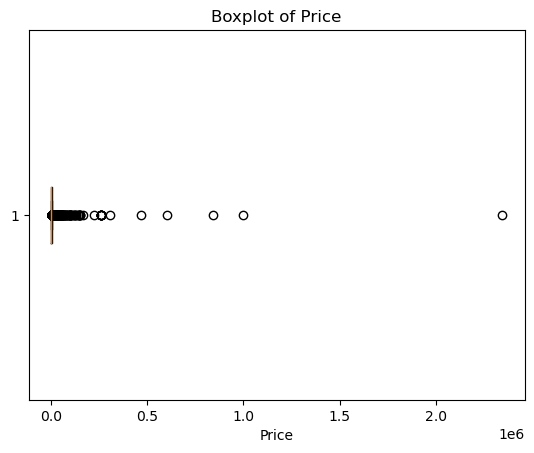

In [31]:
# Plot a boxplot of the 'price' column
plt.boxplot(q4_lst['price'], vert=False)  # vert=False for horizontal boxplot
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

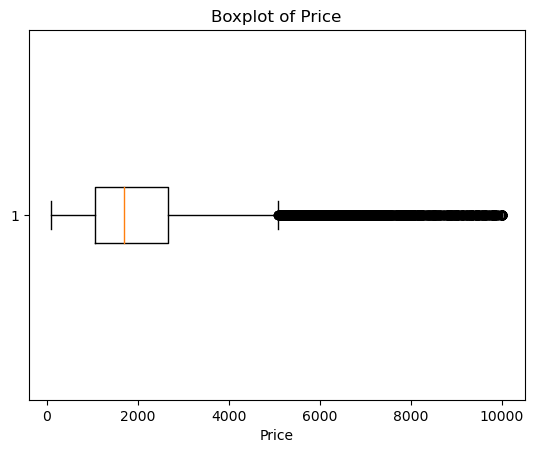

In [32]:
# Create a sample DataFrame with a 'price' column
q4_lst_price = q4_lst.query("price<=10000")

# Plot a boxplot of the 'price' column
plt.boxplot(q4_lst_price['price'], vert=False)  # vert=False for horizontal boxplot
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

In [33]:
# Run Spearman correlation as the price column has outliers and we don't need to drop expensive listings
c = q4_lst_price.corr(method="spearman")

/var/folders/6_/fb5qsd194x777fhvyzrybjmw0000gn/T/ipykernel_37307/1249014598.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = q4_lst_price.corr(method="spearman")


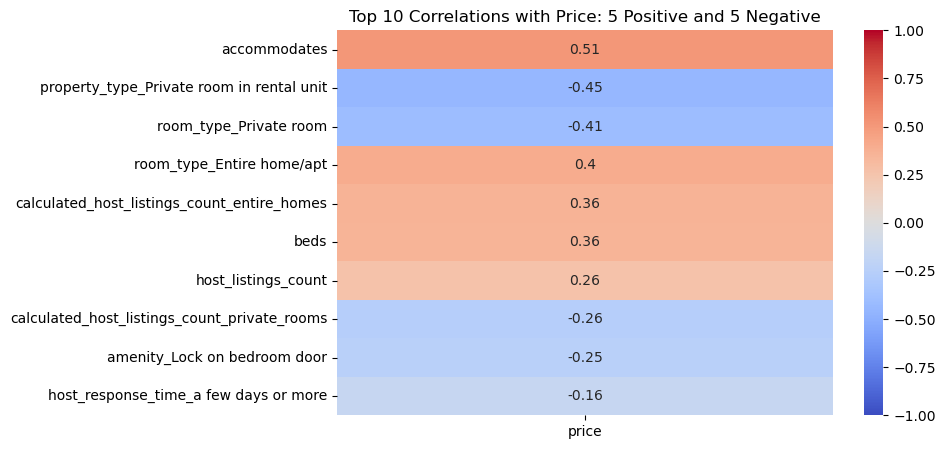

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'c' is your correlation matrix
price_corr = c['price']  # Extract the 'price' column

# Get top 5 positive correlations (excluding 'price' itself)
top_5_positive = price_corr.nlargest(6).index[1:]  # Exclude 'price' itself

# Get top 5 negative correlations
top_5_negative = price_corr.nsmallest(5).index

# Concatenate indices of top positive and negative correlations
top_10 = top_5_positive.union(top_5_negative)

# Select only correlations with 'price' and reorder based on top_10
heatmap_data = c.loc[top_10, ['price']]

# Sort the heatmap data according to the correlation values
heatmap_data_sorted = heatmap_data.reindex(heatmap_data['price'].abs().sort_values(ascending=False).index)

# Plotting the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data_sorted, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Top 10 Correlations with Price: 5 Positive and 5 Negative')
plt.show()

### Q2: Which neighborhoods have the highest demand for Airbnb listings in Istanbul?

In [35]:
#Create Variables for Days Booked
q4_lst["booked_365"] = 365 - q4_lst["availability_365"]
q4_lst["booked_90"] = 90 - q4_lst["availability_90"]
q4_lst["booked_60"] = 60 - q4_lst["availability_60"]
q4_lst["booked_30"] = 30 - q4_lst["availability_30"]

#### Assuming demand can be measured by days booked in the upcoming 2 months

In [71]:
# Filter out blocked listings and not in-demand listings
q4_lst_demand = q4_lst.query("booked_90 < 90 & booked_90 > 0")
neighborhood_counts = q4_lst_demand['neighbourhood_cleansed'].value_counts()
q4_lst_demand = q4_lst_demand.merge(neighborhood_counts.rename('count'), left_on='neighbourhood_cleansed', right_index=True)

In [72]:
q4_lst_demand['booking_rate'] = q4_lst_demand['booked_90'] / 90
neighborhood_demand = q4_lst_demand.groupby('neighbourhood_cleansed').agg(
    mean_booking_rate=('booking_rate', 'mean'),
    mean_price = ('price', 'mean'),
    total_listings=('id', 'count'),
)

In [73]:
neighborhood_demand['demand_score'] = neighborhood_demand['mean_booking_rate'] * neighborhood_demand['total_listings']

scaler = MinMaxScaler()
neighborhood_demand['demand_score'] = scaler.fit_transform(neighborhood_demand[['demand_score']])

neighborhood_demand = neighborhood_demand.sort_values(by="demand_score", ascending=False)

In [74]:
neighborhood_demand['demand_score'].sort_values(ascending=False)

neighbourhood_cleansed
Beyoglu          1.000000
Sisli            0.510124
Kadikoy          0.451768
Fatih            0.332084
Besiktas         0.222468
Uskudar          0.105310
Kagithane        0.102597
Esenyurt         0.092054
Bagcilar         0.065701
Atasehir         0.064023
Bahcelievler     0.058551
Maltepe          0.056659
Basaksehir       0.043487
Avcilar          0.035768
Umraniye         0.033792
Adalar           0.032403
Bakirkoy         0.030035
Pendik           0.029588
Sariyer          0.029364
Eyup             0.026362
Zeytinburnu      0.023873
Kucukcekmece     0.023379
Kartal           0.020881
Beylikduzu       0.017973
Buyukcekmece     0.011410
Sile             0.010580
Arnavutkoy       0.010580
Gaziosmanpasa    0.007952
Gungoren         0.006106
Tuzla            0.005891
Beykoz           0.005323
Cekmekoy         0.003766
Bayrampasa       0.003319
Esenler          0.002470
Silivri          0.002433
Sancaktepe       0.002330
Sultangazi       0.000914
Sultanbeyli    

/var/folders/6_/fb5qsd194x777fhvyzrybjmw0000gn/T/ipykernel_37307/3546055342.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(neighborhood_demand.index, rotation=90)


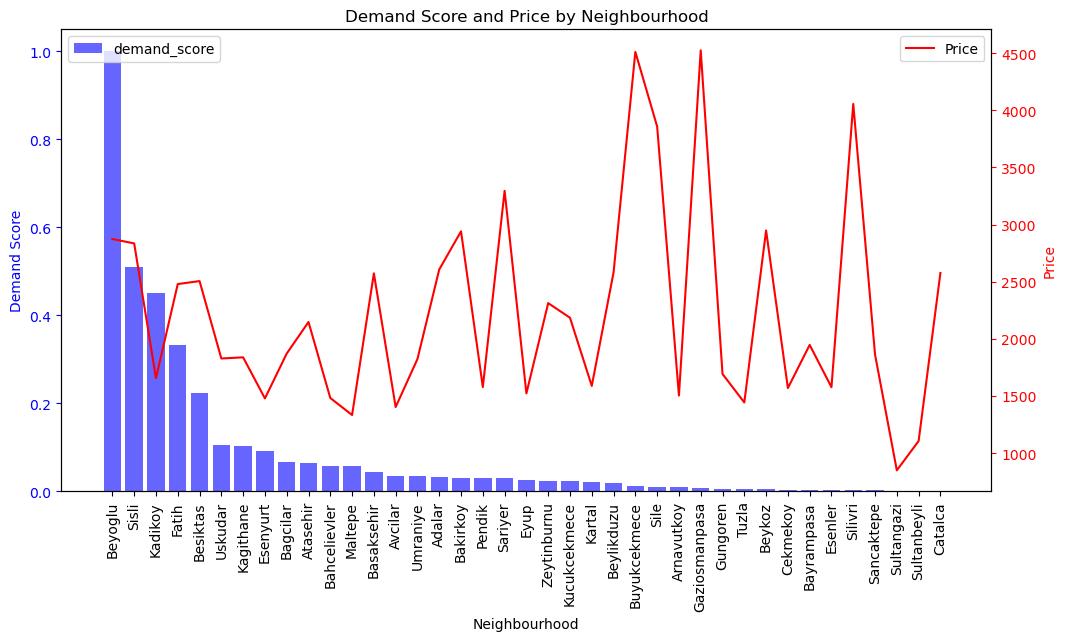

In [76]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for 'booked_60'
ax1.bar(neighborhood_demand.index, neighborhood_demand['demand_score'], color='b', alpha=0.6, label='demand_score')
ax1.set_xlabel('Neighbourhood')
ax1.set_ylabel('Demand Score', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xticklabels(neighborhood_demand.index, rotation=90)

# Create another y-axis for the 'price'
ax2 = ax1.twinx()
ax2.plot(neighborhood_demand.index, neighborhood_demand['mean_price'], color='r', label='Price')
ax2.set_ylabel('Price', color='r')
ax2.tick_params('y', colors='r')

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Demand Score and Price by Neighbourhood')
plt.show()

### Q3: What are the most commonly offered amenities by successful hosts in Istanbul?

The Airbnb rating system looks like this…….

5.0 = maximum...................................100%

4.9 ...........................................................98%

4.8 = Superhost....................................96%

4.7 = minimum requirement..............94%

4.6 = delisted.

In [68]:
q4_lst_successful = q4_lst.query("number_of_reviews>0 & review_scores_rating >= 4.90")
q4_lst_successful.shape[0]

8838

In [69]:
# Step 1: Convert string-encoded lists to actual lists
#q4_lst_successful['amenities'] = q4_lst_successful['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Step 2: Count the frequencies of each amenity
amenities_counter = Counter(amenity for sublist in q4_lst_successful['amenities'] for amenity in sublist)

<Figure size 1800x600 with 0 Axes>

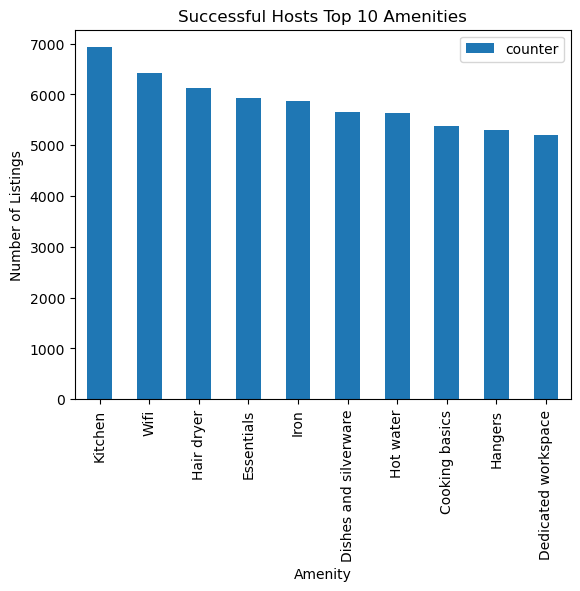

In [74]:
plot_bar_chart(data=pd.DataFrame.from_dict(amenities_counter, orient='index', columns=["counter"]).sort_values(by="counter", ascending=False)[:10], title="Successful Hosts Top 10 Amenities", ylabel="Number of Listings", xlabel="Amenity")

### Q4: How does response time impact booking success for Airbnb hosts in Istanbul?

/var/folders/6_/fb5qsd194x777fhvyzrybjmw0000gn/T/ipykernel_858/2275374803.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  q4_rt = q4_lst.groupby("host_response_time").mean()[["booked_30", "booked_60", "booked_90", "booked_365"]]


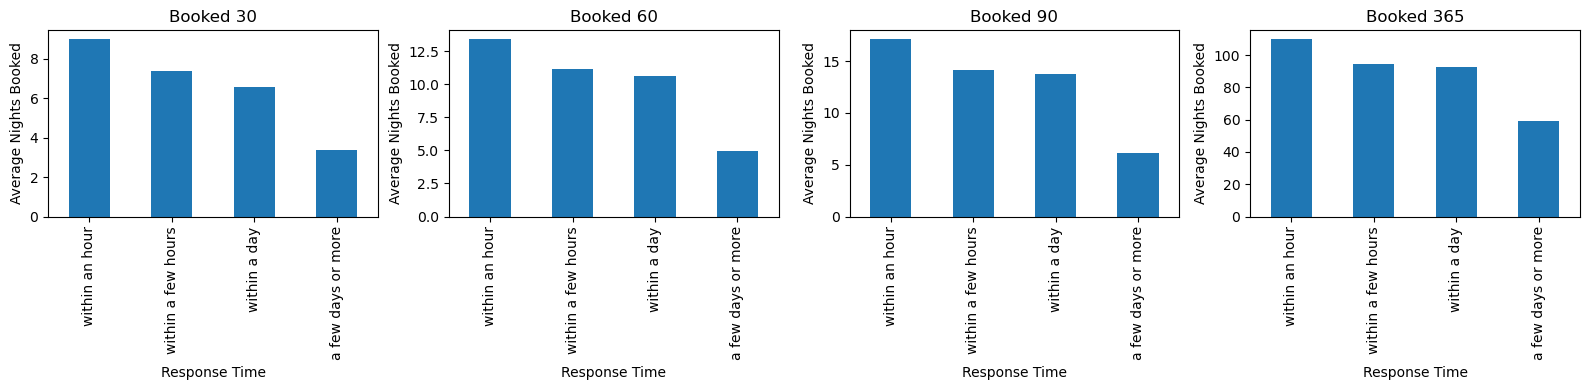

In [72]:
q4_rt = q4_lst.groupby("host_response_time").mean()[["booked_30", "booked_60", "booked_90", "booked_365"]]

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))  # Adjust the figure size as needed

# Plot each 'booked_X' category in a separate subplot
q4_rt['booked_30'].sort_values(ascending=False).plot(kind='bar', ax=axes[0], title='Booked 30')
q4_rt['booked_60'].sort_values(ascending=False).plot(kind='bar', ax=axes[1], title='Booked 60')
q4_rt['booked_90'].sort_values(ascending=False).plot(kind='bar', ax=axes[2], title='Booked 90')
q4_rt['booked_365'].sort_values(ascending=False).plot(kind='bar', ax=axes[3], title='Booked 365')

# Optional: set labels for each subplot
for ax in axes:
    ax.set_ylabel('Average Nights Booked')
    ax.set_xlabel('Response Time')

# Display the plot
plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area
plt.show()

/var/folders/6_/fb5qsd194x777fhvyzrybjmw0000gn/T/ipykernel_858/3710712011.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plot_bar_chart(data=q4_lst.groupby("host_response_time").mean()["reviews_per_month"].sort_values(ascending=False), title="Reviews/Month Grouped by Host Response Time", ylabel="Average Reviews/Month", xlabel="Host Response Time")


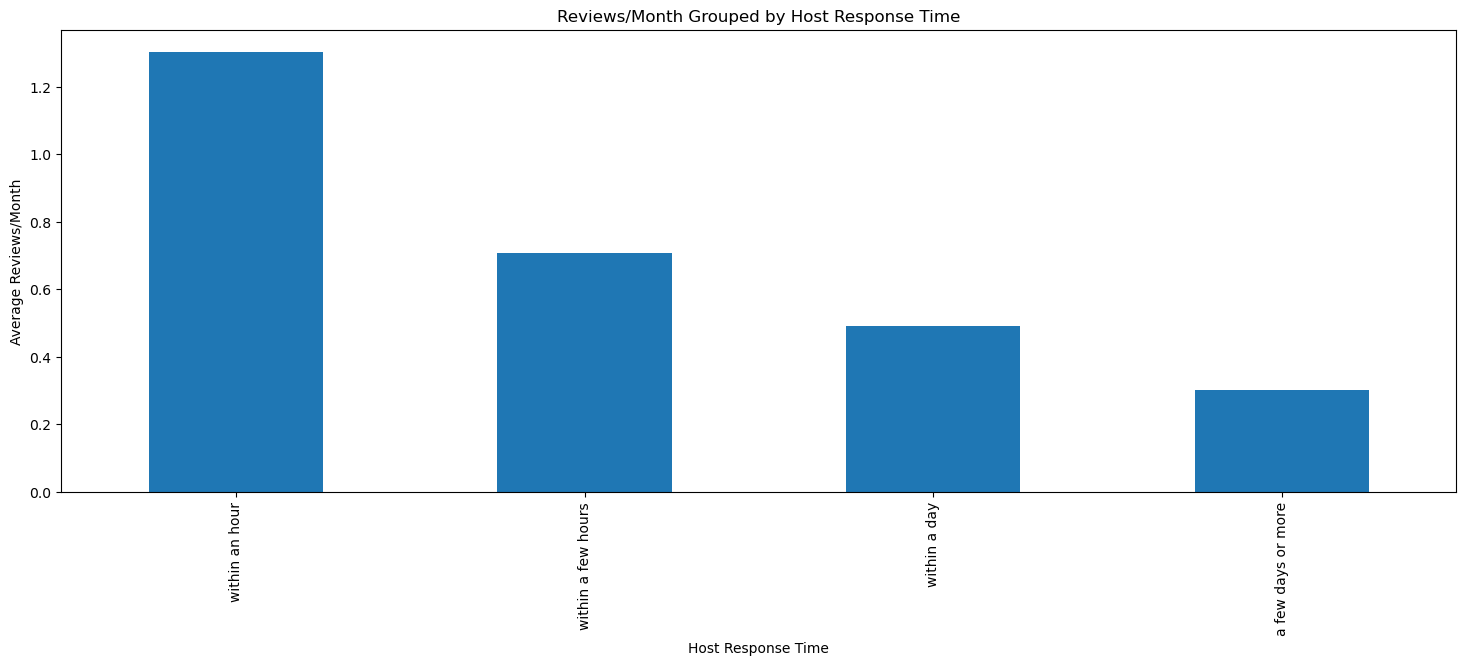

In [75]:
plot_bar_chart(data=q4_lst.groupby("host_response_time").mean()["reviews_per_month"].sort_values(ascending=False), title="Reviews/Month Grouped by Host Response Time", ylabel="Average Reviews/Month", xlabel="Host Response Time")

### Q5: What are the characteristics of superhosts in Istanbul?

In [91]:
q4_lst_sh = q4_lst.query("host_is_superhost==1")
q4_lst_nh = q4_lst.query("host_is_superhost==0")

/var/folders/6_/fb5qsd194x777fhvyzrybjmw0000gn/T/ipykernel_37307/1986685442.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4_lst_nh['bucket'] = pd.cut(q4_lst_nh['host_response_rate'], bins=bins, labels=labels, include_lowest=True)
/var/folders/6_/fb5qsd194x777fhvyzrybjmw0000gn/T/ipykernel_37307/1986685442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4_lst_sh['bucket'] = pd.cut(q4_lst_sh['host_response_rate'], bins=bins, labels=labels, include_lowest=True)


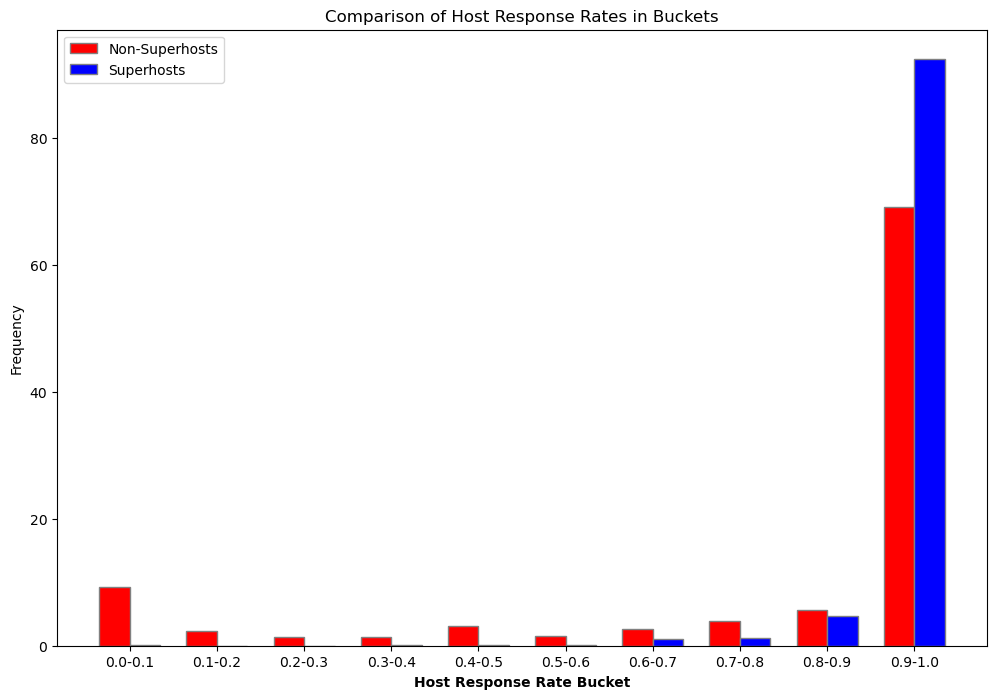

In [92]:
bins = [i/10.0 for i in range(11)]  # Buckets [0, 0.1, 0.2, ..., 1]
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

q4_lst_nh['bucket'] = pd.cut(q4_lst_nh['host_response_rate'], bins=bins, labels=labels, include_lowest=True)
q4_lst_sh['bucket'] = pd.cut(q4_lst_sh['host_response_rate'], bins=bins, labels=labels, include_lowest=True)

non_superhosts_counts = q4_lst_nh['bucket'].value_counts(normalize=True).sort_index() * 100
superhosts_counts = q4_lst_sh['bucket'].value_counts(normalize=True).sort_index() * 100

# Bar positions
barWidth = 0.35
r1 = np.arange(len(superhosts_counts))
r2 = [x + barWidth for x in r1]

# Create the bars
plt.figure(figsize=(12, 8))
plt.bar(r1, non_superhosts_counts, color='r', width=barWidth, edgecolor='grey', label='Non-Superhosts')
plt.bar(r2, superhosts_counts, color='b', width=barWidth, edgecolor='grey', label='Superhosts')

# Add xticks on the middle of the group bars
plt.xlabel('Host Response Rate Bucket', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(superhosts_counts))], labels)

plt.ylabel('Frequency')
plt.title('Comparison of Host Response Rates in Buckets')

# Create legend & Show graphic
plt.legend()
plt.show()

/var/folders/6_/fb5qsd194x777fhvyzrybjmw0000gn/T/ipykernel_37307/2683281624.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4_lst_nh['bucket'] = pd.cut(q4_lst_nh['host_acceptance_rate'], bins=bins, labels=labels, include_lowest=True)
/var/folders/6_/fb5qsd194x777fhvyzrybjmw0000gn/T/ipykernel_37307/2683281624.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q4_lst_sh['bucket'] = pd.cut(q4_lst_sh['host_acceptance_rate'], bins=bins, labels=labels, include_lowest=True)


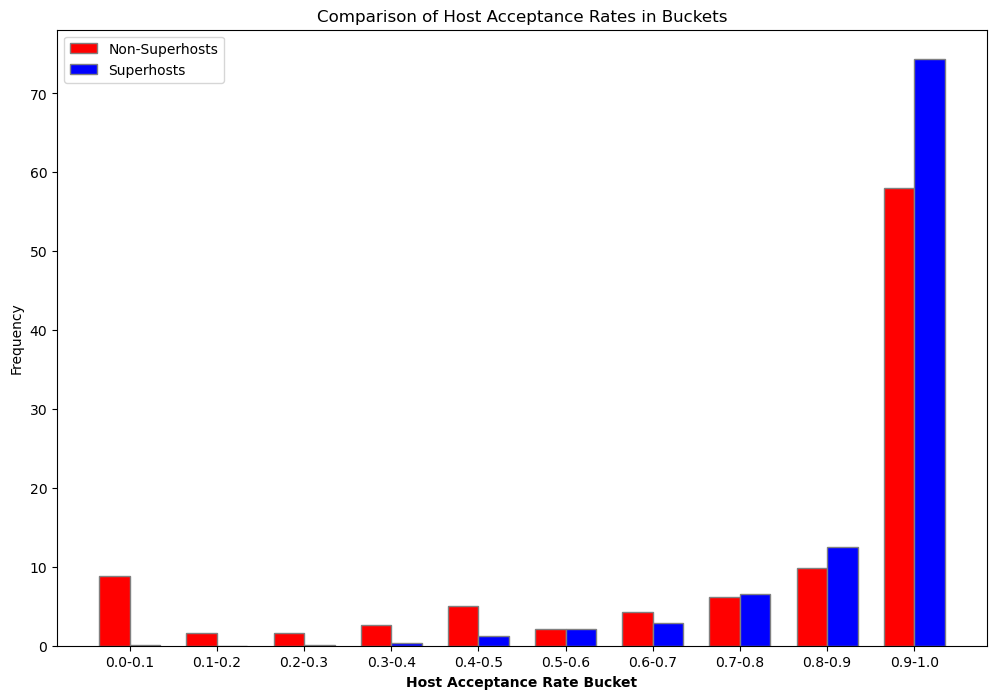

In [95]:
bins = [i/10.0 for i in range(11)]  # Buckets [0, 0.1, 0.2, ..., 1]
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

q4_lst_nh['bucket'] = pd.cut(q4_lst_nh['host_acceptance_rate'], bins=bins, labels=labels, include_lowest=True)
q4_lst_sh['bucket'] = pd.cut(q4_lst_sh['host_acceptance_rate'], bins=bins, labels=labels, include_lowest=True)

non_superhosts_counts = q4_lst_nh['bucket'].value_counts(normalize=True).sort_index() * 100
superhosts_counts = q4_lst_sh['bucket'].value_counts(normalize=True).sort_index() * 100

# Bar positions
barWidth = 0.35
r1 = np.arange(len(superhosts_counts))
r2 = [x + barWidth for x in r1]

# Create the bars
plt.figure(figsize=(12, 8))
plt.bar(r1, non_superhosts_counts, color='r', width=barWidth, edgecolor='grey', label='Non-Superhosts')
plt.bar(r2, superhosts_counts, color='b', width=barWidth, edgecolor='grey', label='Superhosts')

# Add xticks on the middle of the group bars
plt.xlabel('Host Acceptance Rate Bucket', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(superhosts_counts))], labels)

plt.ylabel('Frequency')
plt.title('Comparison of Host Acceptance Rates in Buckets')

# Create legend & Show graphic
plt.legend()
plt.show()

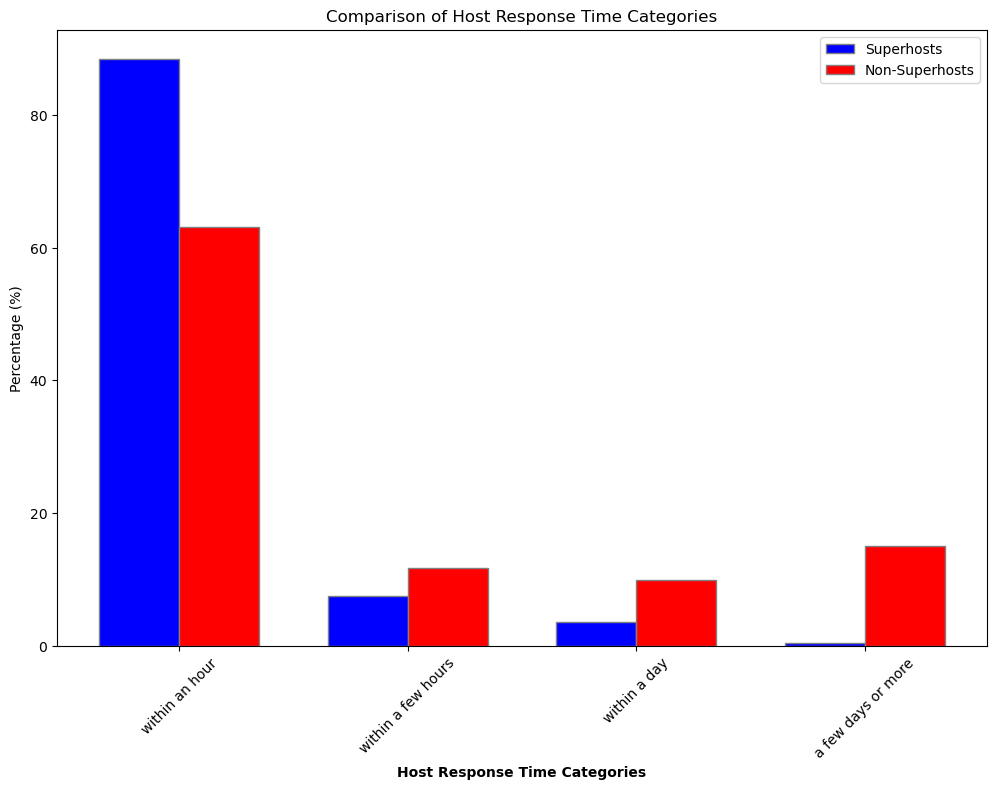

In [98]:
superhosts_counts = (q4_lst_sh['host_response_time'].value_counts(normalize=True).sort_index() * 100).sort_values(ascending=False)
non_superhosts_counts = (q4_lst_nh['host_response_time'].value_counts(normalize=True).sort_index() * 100).reindex(superhosts_counts.index)

barWidth = 0.35
r1 = np.arange(len(superhosts_counts))
r2 = [x + barWidth for x in r1]

# Create the bars
plt.figure(figsize=(12, 8))
plt.bar(r1, superhosts_counts, color='b', width=barWidth, edgecolor='grey', label='Superhosts')
plt.bar(r2, non_superhosts_counts, color='r', width=barWidth, edgecolor='grey', label='Non-Superhosts')

# Add xticks on the middle of the group bars
plt.xlabel('Host Response Time Categories', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(superhosts_counts))], superhosts_counts.index, rotation=45)

plt.ylabel('Percentage (%)')
plt.title('Comparison of Host Response Time Categories')

# Create legend & Show graphic
plt.legend()
plt.show()

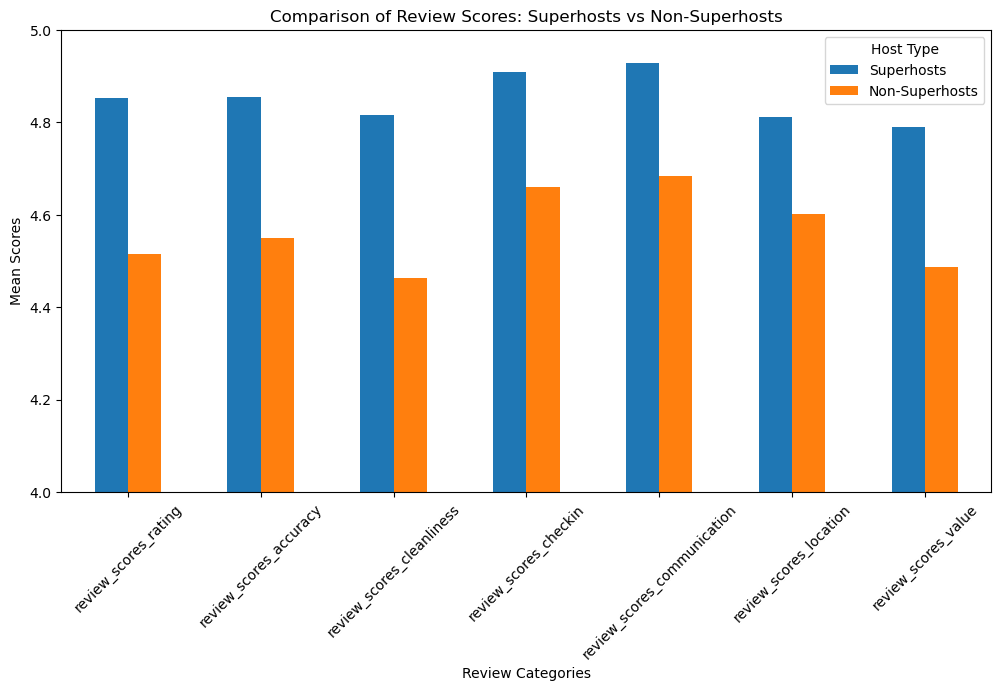

In [105]:
categories = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
              'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
              'review_scores_value']

superhosts_means = q4_lst_sh[categories].mean()
non_superhosts_means = q4_lst_nh[categories].mean()
mean_scores = pd.DataFrame({'Superhosts': superhosts_means, 'Non-Superhosts': non_superhosts_means})

mean_scores.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Review Scores: Superhosts vs Non-Superhosts')
plt.xlabel('Review Categories')
plt.ylabel('Mean Scores')
plt.xticks(rotation=45)
plt.legend(title='Host Type')
# Set y-axis limits
plt.ylim(4.0, 5.0)
plt.show()

In [106]:
mean_scores

,Superhosts,Non-Superhosts
review_scores_rating,4.852728,4.515594
review_scores_accuracy,4.853962,4.549710
review_scores_cleanliness,4.815410,4.464070
review_scores_checkin,4.908491,4.660788
review_scores_communication,4.928270,4.684455
review_scores_location,4.812583,4.602769
review_scores_value,4.789902,4.486409


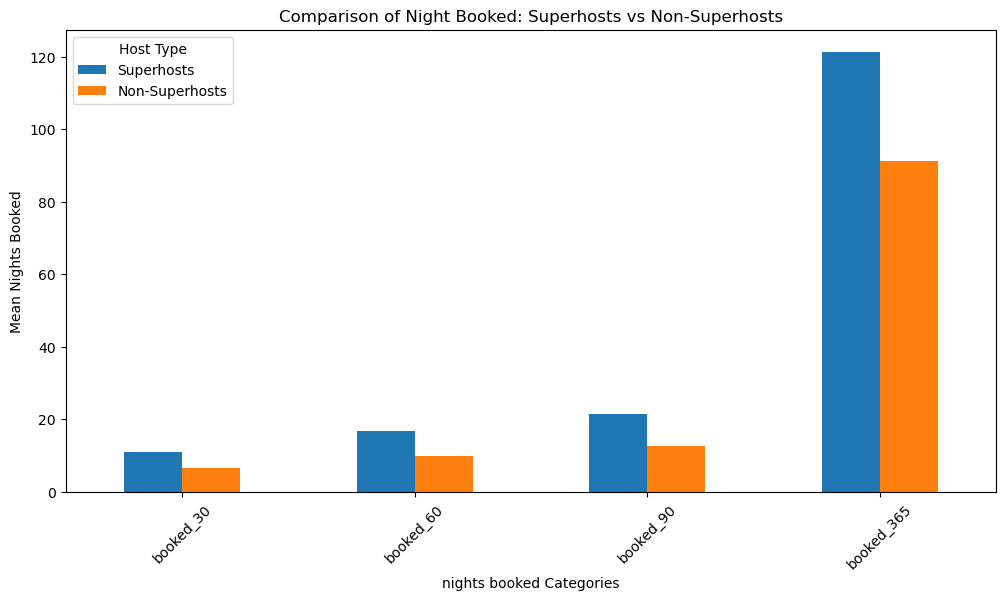

In [103]:
categories = ["booked_30", "booked_60", "booked_90", "booked_365"]

superhosts_means = q4_lst_sh[categories].mean()
non_superhosts_means = q4_lst_nh[categories].mean()
mean_scores = pd.DataFrame({'Superhosts': superhosts_means, 'Non-Superhosts': non_superhosts_means})

#plot_bar_chart(data=mean_scores, title="Comparison of Night Booked: Superhosts vs Non-Superhosts", ylabel="Mean Nights Booked", xlabel="nights booked Categories")
mean_scores.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Night Booked: Superhosts vs Non-Superhosts')
plt.xlabel('nights booked Categories')
plt.ylabel('Mean Nights Booked')
plt.xticks(rotation=45)
plt.legend(title='Host Type')
# Set y-axis limits
plt.show()

In [104]:
mean_scores

,Superhosts,Non-Superhosts
booked_30,10.969534,6.517188
booked_60,16.731614,9.809630
booked_90,21.475131,12.584167
booked_365,121.382741,91.309347
